In [245]:
# usual imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform, randint

In [246]:
data = pd.read_csv('taskdata.csv')

In [247]:
data.shape

(4407, 17)

In [248]:
data.head(2)

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.5,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.25,32.416667,27.916667,0.25,0
1,410240,499.0,37,8.2,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.30,16.200000,13.800000,0.00,0


- 4407 records
- 16 Independent variables, 1 Dependent variable

In [249]:
data.columns

Index(['user_id', 'account_id', 'max_return_days', 'average_return_days',
       'customer_since_months', 'total_revenue', 'average_revenue',
       'avg_vas_count', 'avg_used_vas_value', 'business_type',
       'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads',
       'avg_email_replies', 'avg_call_replies', 'avg_sms_replies', 'target'],
      dtype='object')

### check duplicate rows

In [250]:
data.duplicated().any()

False

In [251]:
data.isna().sum()

user_id                  0
account_id               7
max_return_days          0
average_return_days      0
customer_since_months    0
total_revenue            0
average_revenue          0
avg_vas_count            0
avg_used_vas_value       0
business_type            0
avg_wallet_bonus         0
avg_active_ads           0
avg_new_ads              0
avg_email_replies        0
avg_call_replies         0
avg_sms_replies          0
target                   0
dtype: int64

- 7 nan values in 'account_id'

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4407 non-null   int64  
 1   account_id             4400 non-null   float64
 2   max_return_days        4407 non-null   int64  
 3   average_return_days    4407 non-null   float64
 4   customer_since_months  4407 non-null   int64  
 5   total_revenue          4407 non-null   float64
 6   average_revenue        4407 non-null   float64
 7   avg_vas_count          4407 non-null   float64
 8   avg_used_vas_value     4407 non-null   float64
 9   business_type          4407 non-null   int64  
 10  avg_wallet_bonus       4407 non-null   float64
 11  avg_active_ads         4407 non-null   float64
 12  avg_new_ads            4407 non-null   float64
 13  avg_email_replies      4407 non-null   float64
 14  avg_call_replies       4407 non-null   float64
 15  avg_

- All fields are of 'float' or 'int' dtype

In [253]:
data.head(0)

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target


### Drop 'user_id' and 'account_id' as they are presumably irrelevant to Target variable

In [254]:
data2 = data.drop(columns=['user_id', 'account_id'])

In [255]:
data2.isna().sum().sum()

0

- no nan values

In [256]:
data2['avg_vas_count'].value_counts()

0.000000     1063
1.000000      117
2.000000       94
3.000000       60
0.500000       59
             ... 
16.400000       1
8.416667        1
7.636364        1
1.222222        1
5.545455        1
Name: avg_vas_count, Length: 677, dtype: int64

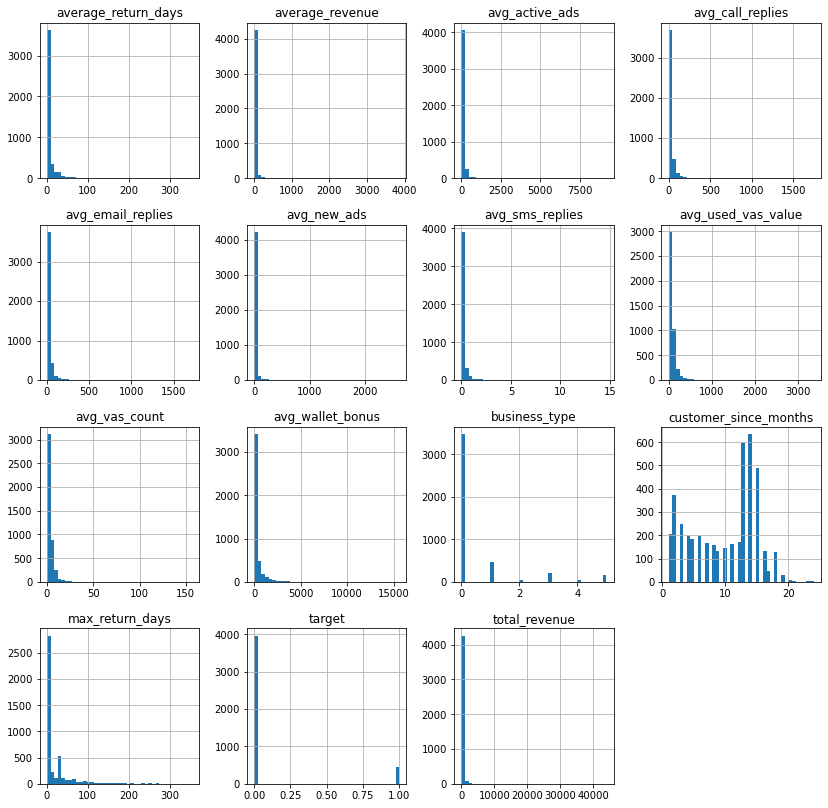

In [257]:
data2.hist(bins=40, figsize=(14, 14));

In [258]:
data2.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
max_return_days,4407.0,22.335602,43.591246,1.0,1.000000,2.000000,30.000000,354.000000
average_return_days,4407.0,7.171576,19.209092,0.5,1.000000,1.076923,5.666667,354.000000
customer_since_months,4407.0,9.874064,5.169639,1.0,5.000000,12.000000,14.000000,24.000000
total_revenue,4407.0,194.130365,1548.361547,0.0,0.000000,0.000000,0.000000,43957.172700
average_revenue,4407.0,16.942615,128.268824,0.0,0.000000,0.000000,0.000000,3852.727273
avg_vas_count,4407.0,3.249388,5.509869,0.0,0.142857,2.000000,4.333333,156.583333
avg_used_vas_value,4407.0,72.119006,117.019515,0.0,2.727273,45.000000,100.000000,3357.500000
business_type,4407.0,0.497844,1.199725,0.0,0.000000,0.000000,0.000000,5.000000
avg_wallet_bonus,4407.0,338.851046,831.746150,0.0,0.000000,40.000000,327.280000,15606.500000
avg_active_ads,4407.0,98.922260,297.692950,0.0,13.500000,40.000000,101.291667,9183.866667



- All variables have a highly right-skewed distribution except 'customer_since_months' which has a multi-modal distribution
- 'business_type' is a categorical variable

- 'max_return_days' has a high number of 1's and has a highly right-skewed distribution.
- 'average_return_days' - 75% of values are below 6 and max is 354
- 'customer_since_months' has a multi-modal distribution
- 'total_revenue' - 75% of all values are 0 and max is 43957
- 'average_revenue' - 75% of all values are 0 and max is 3852
- 'avg_vas_count' - 75% of all values are belowm 4.3 and max is 156.5
- 'avg_used_vas_value' - highly right-skewed with min-value 0 and max-value 3357.5
- 'avg_wallet_bonus' - highly right-skewed, 25% values are 0, max is 15606.5
- 'avg_active_ads', 'avg_new_ads', 'avg_email_replies', 'avg_call_replies' are all highy right-skewed
- 'avg_sms_replies' - 50% of all values are 0, max is 14.6

- Large number of 0's might be the result of missing data, which can be worked out if have access to more information about the data

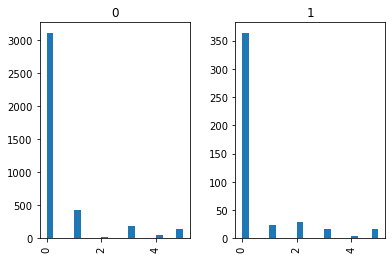

In [259]:
# business_type
data2.hist(column='business_type', bins=20, by='target');

- Type 2's are more likely to belong to class-1 and thus is a good indicator
- Other types don't appear to discriminate.

### Creating a feature

- total_revenue = p1 + p2 + ... + pN
- average_revenue = total_revenue / N
##### where 'N' is total number of purchase made
- If total_revenue = average_revenue 
- then N=1, meaning total number of purchase made = N = 1
- otherwise, N > 1

In [181]:
data2['more_than_one_purchase'] = (~(data2['total_revenue'] == data2['average_revenue'])).astype(int)

### Target Distribution

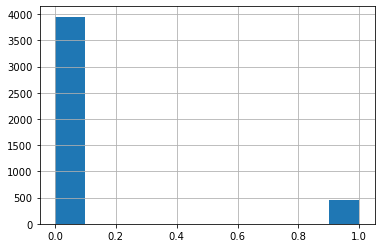

In [260]:
data2['target'].hist();

- ~ 4000 belongs to class-0
- ~ 500 belongs to class-1
- Target class distribution is highly imbalanced

### Converting business_type, which is a categorical variable, to one-hot-encoding

In [261]:
data2 = pd.get_dummies(data2, columns=['business_type'], drop_first=True)

### Tree-based algorithms are robust to outliers as they basically attempts to find "best" split for a feature.

### Correlation matrix

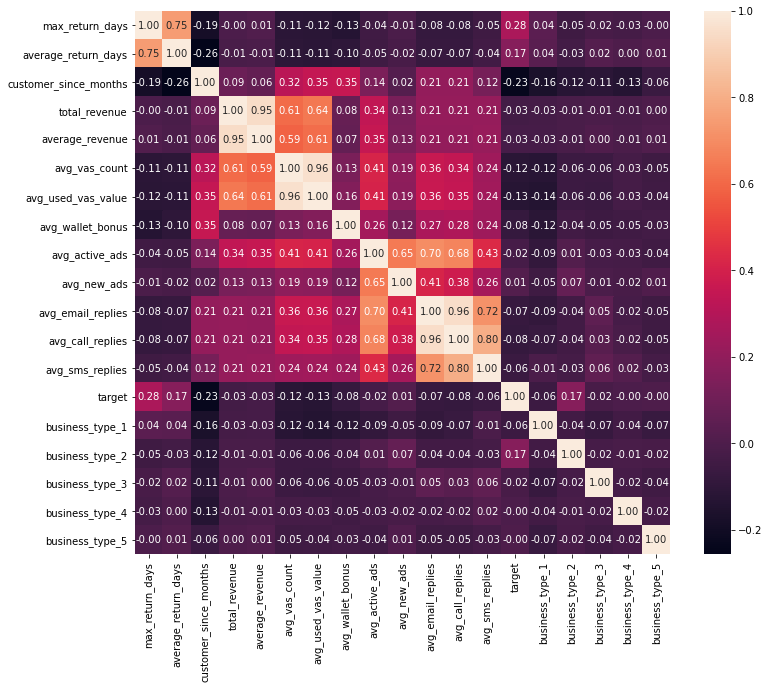

In [262]:
plt.figure(figsize=(12, 10))
sns.heatmap(data2.corr(), annot=True, fmt='.2f');

- As can be seen, there are features have a very high correlation, lets remove one of each pair to remove redundancy
- remove business_type_{1, 3, 4, 5}

Features having high correlation:
- 'average_revenue' and 'total_revenue'
- 'avg_used_vas_value' and 'avg_vas_count'
- 'avg_call_replies' and 'avg_email_replies'

In [263]:
data2.columns.values

array(['max_return_days', 'average_return_days', 'customer_since_months',
       'total_revenue', 'average_revenue', 'avg_vas_count',
       'avg_used_vas_value', 'avg_wallet_bonus', 'avg_active_ads',
       'avg_new_ads', 'avg_email_replies', 'avg_call_replies',
       'avg_sms_replies', 'target', 'business_type_1', 'business_type_2',
       'business_type_3', 'business_type_4', 'business_type_5'],
      dtype=object)

In [264]:
data2 = data2.drop(columns=['average_revenue', 'avg_used_vas_value', 'avg_call_replies', 
                            'business_type_1', 'business_type_3', 'business_type_4', 'business_type_5'])

In [265]:
data2.shape

(4407, 12)

In [266]:
data2.dtypes

max_return_days            int64
average_return_days      float64
customer_since_months      int64
total_revenue            float64
avg_vas_count            float64
avg_wallet_bonus         float64
avg_active_ads           float64
avg_new_ads              float64
avg_email_replies        float64
avg_sms_replies          float64
target                     int64
business_type_2            uint8
dtype: object

In [267]:
data2.shape

(4407, 12)

### Creating X and y

In [268]:
X = data2.drop(columns=['target'])
y = data2.loc[:, 'target']
print(X.shape)
print(y.shape)

(4407, 11)
(4407,)


### Splitting into train and test set (30%)

In [269]:
from sklearn.model_selection import train_test_split

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

In [271]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3084, 11)
(3084,)
(1323, 11)
(1323,)


In [272]:
def get_result(y_true, y_pred, cm=True):
    '''
        Print precion, recall and accuracy
    '''
    if cm==True:
        cm = confusion_matrix(y_true, y_pred)
        df_cm = pd.DataFrame(cm, columns=['Predict 0', 'Predict 1'], index=[0, 1])
        sns.heatmap(df_cm, annot=True, fmt='.2f');
    print('Precision score (wrt. class-1): ', precision_score(y_true, y_pred))
    print('Recall score:    ', recall_score(y_true, y_pred))
    print('Accuracy score:  ', accuracy_score(y_true, y_pred))

### GradientBoostingClassifier

In [273]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [274]:
gb = GradientBoostingClassifier(max_depth=2, subsample=0.1, random_state=123)
gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, random_state=123, subsample=0.1)

In [275]:
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)

In [276]:
# Train
get_result(y_train, y_pred_train, cm=False)

Precision score (wrt. class-1):  0.6344827586206897
Recall score:     0.2902208201892745
Accuracy score:   0.9098573281452659


In [277]:
# Test
get_result(y_test, y_pred_test, cm=False)

Precision score (wrt. class-1):  0.3835616438356164
Recall score:     0.2028985507246377
Accuracy score:   0.8828420256991686


##### Hyperparameter Optimization

In [278]:
params_gb = {'loss': ['deviance', 'exponential'],
            'learning_rate': [10**i for i in range(-3, 0)],
            'n_estimators': [100, 200, 300],
            'subsample': uniform(0, 0.6),
            'max_depth': randint(2, 8),
            'max_features': uniform(0, 1),
            'min_samples_leaf': randint(1, 6),
            'min_samples_split': randint(2, 6)}

In [279]:
random_cv_gb = RandomizedSearchCV(gb, params_gb, n_iter=200, cv=5, n_jobs=-1, random_state=123)
random_cv_gb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(max_depth=2,
                                                        random_state=123,
                                                        subsample=0.1),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F8853DE640>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F8853DE1C0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F88603DE50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F88603D0D0>,
                              

In [280]:
gb = GradientBoostingClassifier(**random_cv_gb.best_params_)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=6,
                           max_features=0.42353254323050993, min_samples_leaf=2,
                           min_samples_split=3, n_estimators=300,
                           subsample=0.5117293694161207)

In [281]:
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)

In [282]:
# Train
get_result(y_train, y_pred_train, cm=False)

Precision score (wrt. class-1):  0.9767441860465116
Recall score:     0.39747634069400634
Accuracy score:   0.937094682230869


In [283]:
# Test
get_result(y_test, y_pred_test, cm=False)

Precision score (wrt. class-1):  0.6304347826086957
Recall score:     0.21014492753623187
Accuracy score:   0.9047619047619048


### SHAP

##### Variable Importance

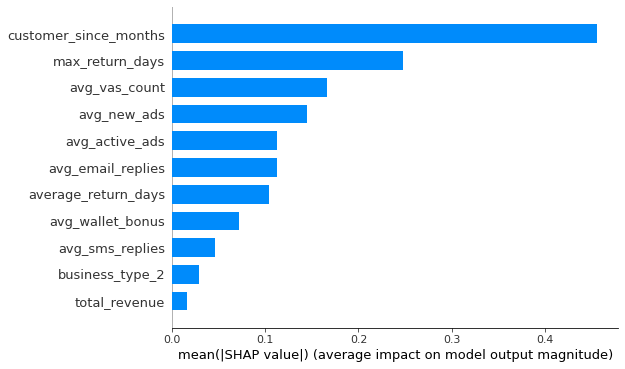

In [285]:
import shap
shap_values = shap.TreeExplainer(gb).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

- The top variables contribute more to the model than the bottom ones and thus have high predictive power.

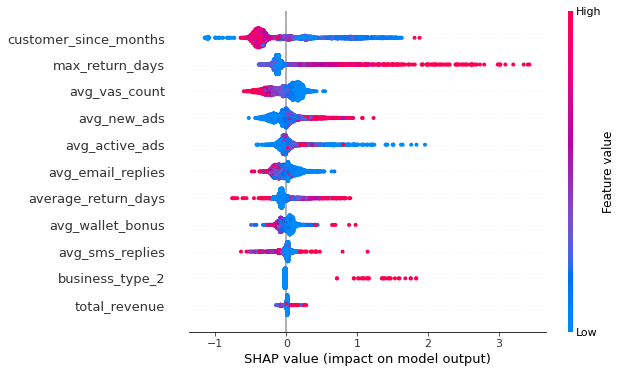

In [286]:
shap.summary_plot(shap_values, X_train)

##### We can also try applying log transformation to the independent variables which are higly right skewed so as to make them normally distributed. Gradient Boosting performs slightly better by doing so